##1. Read the file and check

In [26]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
df = pd.read_csv('high-school-directory.csv')
print(df.columns)
print(df.head())


Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

##2. Clean column names

In [29]:
def clean_column_names(df):
    df.columns = [
        re.sub(r'[^a-z0-9_]', '', col.lower().replace(' ', '_'))
        for col in df.columns
    ]
    return df

df = clean_column_names(df)

print(df.columns.tolist())

['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10', 'location_1', 'comm

##3. Basic Review of the Dataset

In [30]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dbn,435,435,21K344,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_name,435,435,Rachel Carson High School for Coastal Studies,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,435,5,Brooklyn,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_code,435,256,X450,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone_number,435,427,718-381-7100,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
zip_codes,434.0,NaN,NaN,NaN,14232.228111,3529.272774,10090.0,11606.0,13093.0,16865.75,24669.0
community_districts,435.0,NaN,NaN,NaN,38.372414,19.345374,1.0,22.0,39.0,53.5,71.0
borough_boundaries,435.0,NaN,NaN,NaN,3.452874,1.212249,1.0,2.0,4.0,5.0,5.0
city_council_districts,435.0,NaN,NaN,NaN,28.832184,14.209488,1.0,17.0,32.0,40.0,51.0


## 4. Boroughs Summaries

In [31]:
borough_summary = df.groupby('borough').agg(
    num_schools=('dbn', 'count'),
    total_students=('total_students', 'sum')
).sort_values(by='total_students', ascending=False)

# Display with thousands separator
borough_summary.style.format({'total_students': '{:,.0f}'})

,num_schools,total_students
borough,,
Brooklyn,121,"83,197"
Queens,80,"79,545"
Manhattan,106,"60,752"
Bronx,118,"57,868"
Staten Island,10,"18,475"


## 5. School Types and English Learners

In [32]:
df['school_type'] = df['school_type'].fillna('Unknown')
school_types = df['school_type'].value_counts()
print(school_types)



school_type
Unknown                             331
CTE School                           36
Consortium School                    17
International School                 12
Specialized School                    9
All-Girls School                      8
New School                            6
NYC P-Tech 9-14 School                3
All-Boys School                       3
NYC P-Tech 9-14, New School           3
Consortium, International School      3
CTE - New School                      2
CTE, New School                       1
CTE, International School             1
Name: count, dtype: int64


In [33]:
df["ell_programs"].value_counts()

ell_programs
ESL                                                                                            392
ESL; Transitional Bilingual Program: Spanish                                                    23
ESL; Transitional Bilingual Program: Chinese, Spanish                                            7
ESL; Transitional Bilingual Program: Chinese                                                     3
ESL; Dual Language: Spanish                                                                      3
ESL; Dual Language: Chinese; Transitional Bilingual Program: Chinese                             2
ESL; Dual Language: Spanish; Transitional Bilingual Program: Spanish                             2
ESL; Dual Language: Haitian Creole, Russian; Transitional Bilingual Program: Haitian Creole      1
ESL; Transitional Bilingual Program: Arabic, Chinese, Spanish                                    1
ESL; Transitional Bilingual Program: Bengali, Spanish                                           

In [34]:
# Basic ESL flag (almost all schools)
df['has_esl'] = df['ell_programs'].str.startswith('ESL', na=False)

# "Advanced ELL" = any program with more than just ESL
df['has_advanced_ell'] = df['ell_programs'].str.contains(';', na=False)

## 6.  Visualization of Advanced ELL Support by Borough

- **Queens** stands out with the highest *number* and *percentage* of schools offering advanced ELL programs.
- **Staten Island** has low total numbers, but still a decent proportion (10%) of schools with bilingual/dual language options.
- The rest of the boroughs hover around 7–9%, indicating room for growth in multilingual education support.


In [35]:
ell_summary = df.groupby('borough').agg(
    total_schools=('dbn', 'count'),
    ell_schools=('has_esl', 'sum'),
    advanced_ell_schools=('has_advanced_ell', 'sum')
)

# Percent columns
ell_summary['%_offering_ell'] = (ell_summary['ell_schools'] / ell_summary['total_schools'] * 100).round(1)
ell_summary['%_advanced_ell'] = (ell_summary['advanced_ell_schools'] / ell_summary['total_schools'] * 100).round(1)

ell_summary = ell_summary.sort_values(by='advanced_ell_schools', ascending=False)
ell_summary


,total_schools,ell_schools,advanced_ell_schools,%_offering_ell,%_advanced_ell
borough,,,,,
Queens,80,80,14,100.0,17.5
Brooklyn,121,121,10,100.0,8.3
Bronx,118,118,9,100.0,7.6
Manhattan,106,106,9,100.0,8.5
Staten Island,10,10,1,100.0,10.0


C:\Users\User\AppData\Local\Temp\ipykernel_24732\620877397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


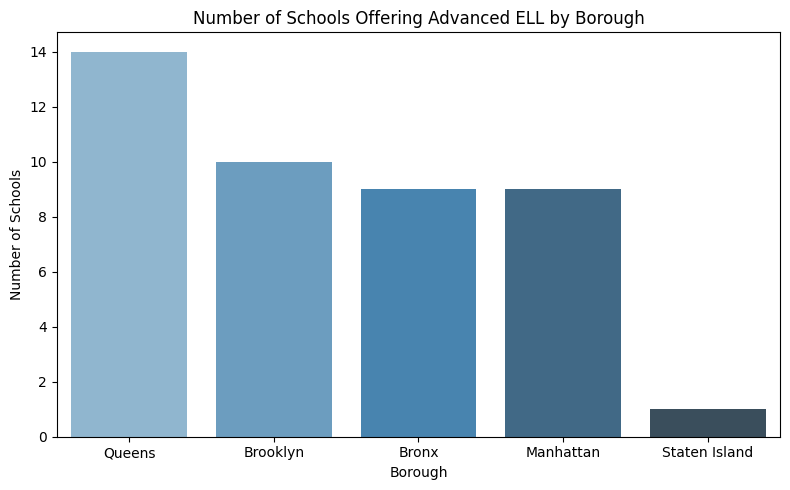

In [36]:


# Reset index for plotting
ell_summary_plot = ell_summary.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=ell_summary_plot,
    x='borough',
    y='advanced_ell_schools',
    palette='Blues_d'
)
plt.title('Number of Schools Offering Advanced ELL by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_24732\1734249300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


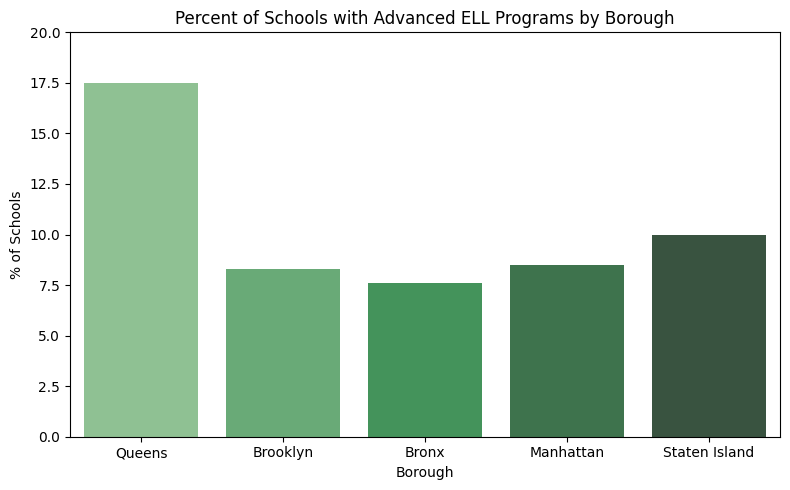

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=ell_summary_plot,
    x='borough',
    y='%_advanced_ell',
    palette='Greens_d'
)
plt.title('Percent of Schools with Advanced ELL Programs by Borough')
plt.xlabel('Borough')
plt.ylabel('% of Schools')
plt.ylim(0, 20)
plt.tight_layout()
plt.show()


## 7. Partnership Summary

In [38]:
# Select all columns that start with 'partner_'
partner_cols = [col for col in df.columns if col.startswith('partner_')]

# Create a new column counting number of non-null partnerships
df['num_partners'] = df[partner_cols].notna().sum(axis=1)

# Quick preview
df[['borough', 'school_name', 'num_partners']].sample(5)


,borough,school_name,num_partners
253,Brooklyn,Academy for College Preparation and Career Exp...,3
40,Brooklyn,Clara Barton High School,7
377,Bronx,Renaissance High School for Musical Theater & ...,4
91,Brooklyn,Williamsburg Preparatory School,6
189,Brooklyn,Brooklyn Community High School of Communicatio...,6


In [39]:
partner_summary = df.groupby('borough').agg(
    total_schools=('dbn', 'count'),
    total_partners=('num_partners', 'sum'),
    avg_partners_per_school=('num_partners', 'mean')
).round(2)

partner_summary = partner_summary.sort_values('avg_partners_per_school', ascending=False)
partner_summary

,total_schools,total_partners,avg_partners_per_school
borough,,,
Staten Island,10,58,5.80
Manhattan,106,502,4.74
Brooklyn,121,569,4.70
Queens,80,347,4.34
Bronx,118,511,4.33


C:\Users\User\AppData\Local\Temp\ipykernel_24732\1590101256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


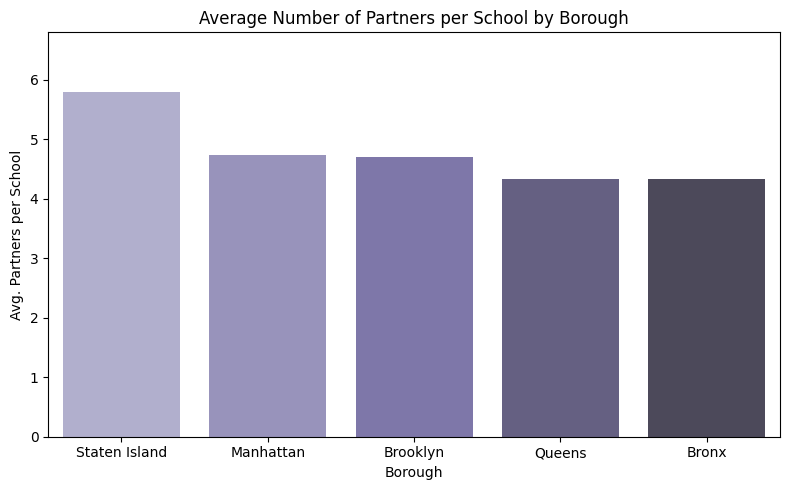

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

partner_plot = partner_summary.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=partner_plot,
    x='borough',
    y='avg_partners_per_school',
    palette='Purples_d'
)
plt.title('Average Number of Partners per School by Borough')
plt.ylabel('Avg. Partners per School')
plt.xlabel('Borough')
plt.ylim(0, partner_plot['avg_partners_per_school'].max() + 1)
plt.tight_layout()
plt.show()


In [41]:
zero_partner_counts = df[df['num_partners'] == 0].groupby('borough').size()
total_schools = df.groupby('borough').size()
zero_partner_pct = (zero_partner_counts / total_schools * 100).fillna(0).round(1)

zero_partner_pct


borough
Bronx            5.9
Brooklyn         4.1
Manhattan        5.7
Queens           6.2
Staten Island    0.0
dtype: float64

## Partnership Analysis Summary

Our analysis of partnership organizations across NYC boroughs reveals important patterns in external support for public high schools:

- **Staten Island schools have the highest average number of partners per school (5.8),** with every school engaged in at least one partnership. This indicates a strong and consistent network of external support despite Staten Island having the fewest schools overall.

- Other boroughs like **Manhattan, Brooklyn, Queens, and the Bronx** have slightly lower average partners per school (ranging from 4.3 to 4.7) and exhibit small percentages (4-6%) of schools without any partnerships. These gaps highlight potential areas where partnership outreach could be strengthened.

- The most common partnership types, while not explicitly quantified here, tend to be community-based organizations and higher education institutions, with corporate and financial partnerships being relatively rare across all boroughs.

- This distribution suggests **potential inequities in resource access**, with Staten Island’s concentrated partnerships offering a model for more uniform engagement, while the other boroughs may benefit from targeted efforts to connect underserved schools with external resources.
